 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv('whale_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  
...                                 ...                     ...  
2019-04-25                    -0.005153                0.004848  
2019-04-26                     0.012355                0.010434  
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833  

[1059 rows x 4 columns]

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_df = pd.read_csv('algo_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
df = pd.read_csv('sp500_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
df.dtypes
df['Close'] = df['Close'].str.replace('$', '',)
df.head()

/var/folders/fk/lbbpg52s3rzfpm3tr9dj_cgc0000gn/T/ipykernel_58432/3894965737.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close'] = df['Close'].str.replace('$', '',)


Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06

In [10]:
# Fix Data Types

df['Close'] = df['Close'].astype('float64')


In [11]:
# Calculate Daily Returns
SP_df = df.pct_change()

In [12]:
# Drop nulls
SP_df.dropna()

Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1648 rows x 1 columns]

In [13]:
# Rename `Close` Column to be specific to this portfolio.
column = ['SPY returns']
SP_df.columns = column
SP_df.head()

SPY returns
Date                   
2019-04-23          NaN
2019-04-22    -0.008764
2019-04-18    -0.001011
2019-04-17    -0.001577
2019-04-16     0.002279

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([SP_df, algo_df,whale_df], axis="columns", join="inner")
combined_df.head(10)

SPY returns    Algo 1    Algo 2  SOROS FUND MANAGEMENT LLC  \
Date                                                                     
2019-04-23          NaN  0.004969  0.009622                   0.007167   
2019-04-22    -0.008764  0.000677 -0.001936                  -0.002586   
2019-04-18    -0.001011 -0.000588 -0.001229                   0.001448   
2019-04-17    -0.001577 -0.010301 -0.005228                  -0.002897   
2019-04-16     0.002279 -0.006945  0.002899                   0.002699   
2019-04-15    -0.000509 -0.004331 -0.004572                  -0.001422   
2019-04-12     0.000630 -0.005501  0.004504                   0.005663   
2019-04-11    -0.006566  0.001705 -0.001568                   0.003406   
2019-04-10    -0.000038 -0.004221  0.009632                   0.009808   
2019-04-09    -0.003466  0.012012 -0.011639                  -0.005657   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                                          
2019-04-23            0.003485                     0.006472   
2019-04-22           -0.007333                    -0.003640   
2019-04-18            0.001222                     0.000582   
2019-04-17           -0.006467                    -0.004409   
2019-04-16            0.000388                    -0.000831   
2019-04-15           -0.001156                     0.000398   
2019-04-12           -0.001165                     0.004217   
2019-04-11           -0.003959                    -0.000637   
2019-04-10            0.008366                     0.002912   
2019-04-09           -0.004396                    -0.006536   

            BERKSHIRE HATHAWAY INC  
Date                                
2019-04-23                0.013278  
2019-04-22               -0.001088  
2019-04-18                0.001916  
2019-04-17                0.003222  
2019-04-16                0.000837  
2019-04-15               -0.010492  
2019-04-12                0.007316  
2019-04-11               -0.000496  
2019-04-10                0.005269  
2019-04-09               -0.002497

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

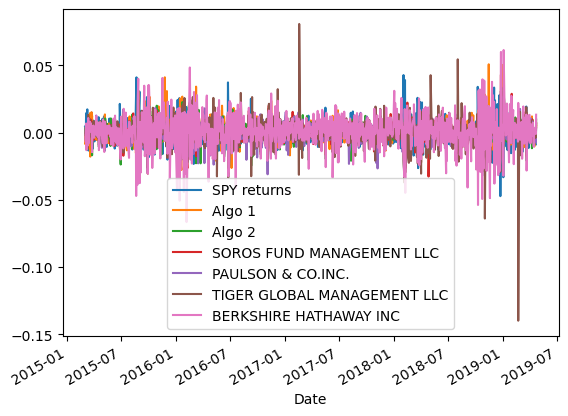

In [15]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

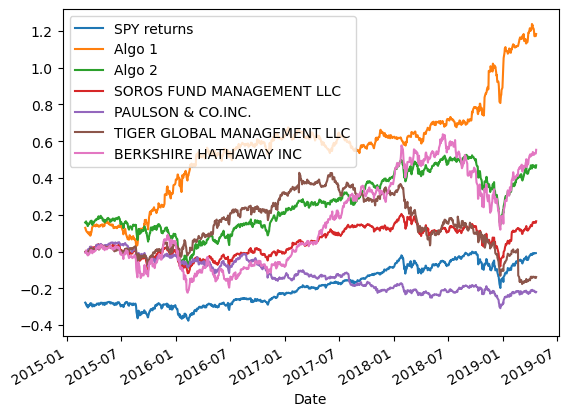

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + SP_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.head()
cumulative_returns2 = (1 + algo_df).cumprod() - 1
cumulative_returns3 = (1 + whale_df).cumprod() - 1
combined_df2 = pd.concat([cumulative_returns,cumulative_returns2,cumulative_returns3],axis='columns',join='inner')
combined_df2.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

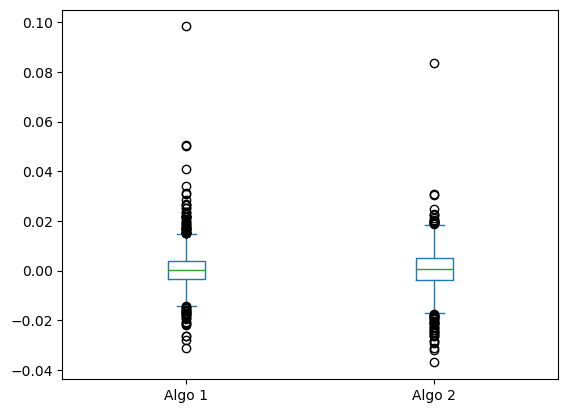

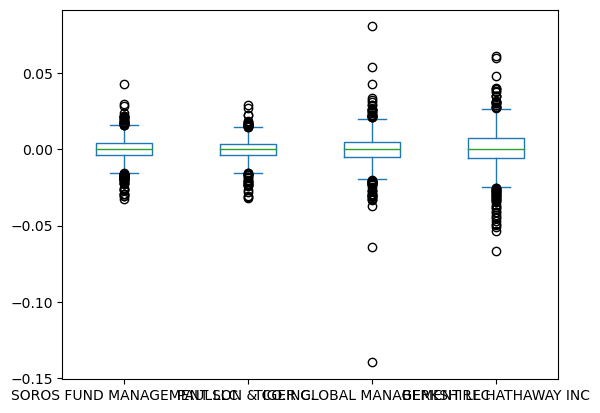

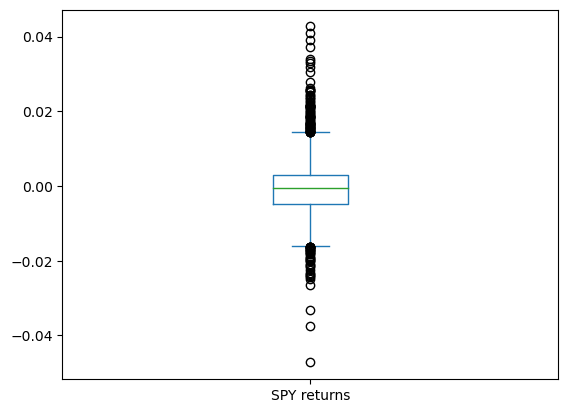

In [17]:
# Box plot to visually show risk
algo_df.plot(kind='box')
whale_df.plot(kind='box')
SP_df.plot(kind='box')

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_df.std()
algo_std = algo_df.std()
print(whale_std,algo_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64 Algo 1    0.007972
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
SP_std = SP_df.std()
print(SP_std)
# Determine which portfolios are riskier than the S&P 500
print('the whale portfolio is rsiker due to the fact the mean of the four holdings standard deviation is .0096185 which is higher than the spys .008135 although soros fund mgmnt and PAULson had lower std algos mean overall was higher however Algo 1 was less risky than the spy')

SPY returns    0.008135
dtype: float64
the whale portfolio is rsiker due to the fact the mean of the four holdings standard deviation is .0096185 which is higher than the spys .008135 although soros fund mgmnt and PAULson had lower std algos mean overall was higher however Algo 1 was less risky than the spy


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
whale_annual = whale_std * np.sqrt(252)
algo_annual = algo_std * np.sqrt(252)
spy_annual = SP_std * np.sqrt(252)
print(whale_annual,algo_annual,spy_annual)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64 Algo 1    0.126558
Algo 2    0.134401
dtype: float64 SPY returns    0.129133
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

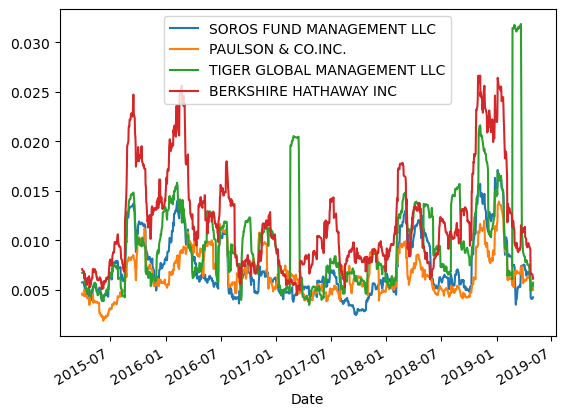

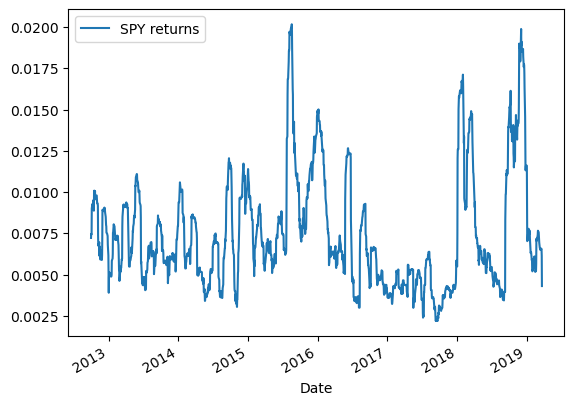

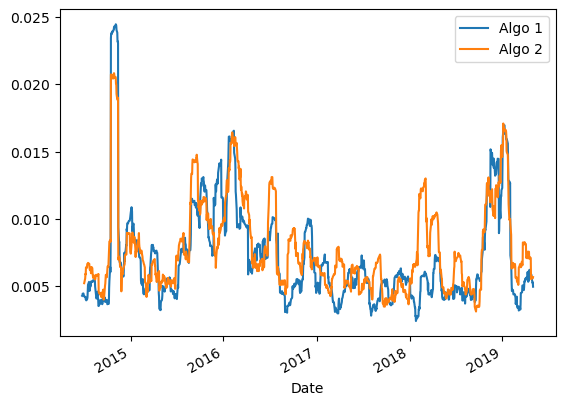

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_21 = whale_df.rolling(window=21).std()
SP_21 = SP_df.rolling(window=21).std()
Algo_21 = algo_df.rolling(window=21).std()
# Plot the rolling standard deviation
whale_21.plot()
SP_21.plot()
Algo_21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

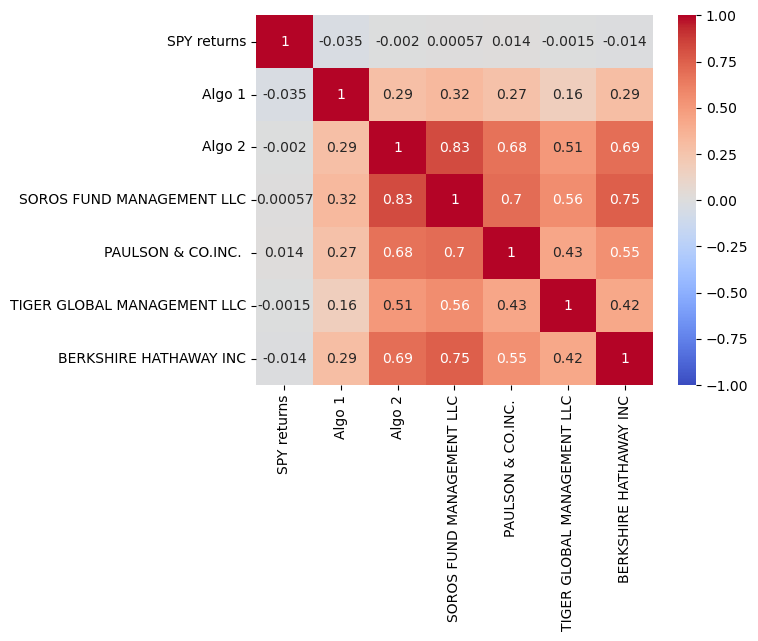

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

          Algo 1    Algo 2
Algo 1  0.000064  0.000023
Algo 2  0.000023  0.000072


<AxesSubplot:>

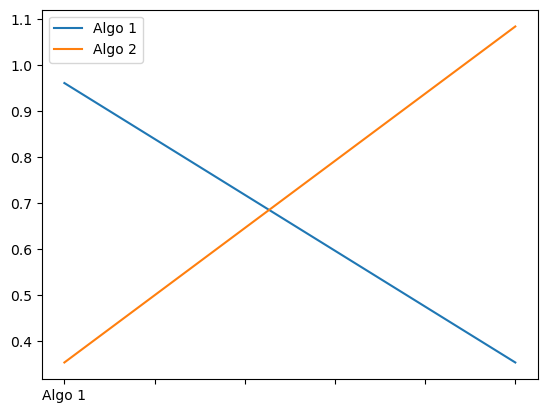

In [23]:
# Calculate covariance of a single portfolio
algo_co = algo_df.cov()
print(algo_co)
# Calculate variance of S&P 500
sp_var = SP_df['SPY returns'].var()
# Computing beta
beta = algo_co / sp_var
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
whale_ewm = whale_std.ewm(halflife=21).mean()
algo_ewm = algo_std.ewm(halflife=21).mean()
SP_ewm = SP_std.ewm(halflife=21).mean()
print(whale_ewm, algo_ewm, SP_ewm)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.007402
TIGER GLOBAL MANAGEMENT LLC    0.008581
BERKSHIRE HATHAWAY INC         0.009696
dtype: float64 Algo 1    0.007972
Algo 2    0.008224
dtype: float64 SPY returns    0.008135
dtype: float64


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
whale_sharpe = (252 ** 0.5) * whale_df.mean() / whale_std
SP_sharpe = (252 ** 0.5) * SP_df.mean() / SP_std
algo_sharpe = (252 ** 0.5) * algo_df.mean() / algo_std


<AxesSubplot:>

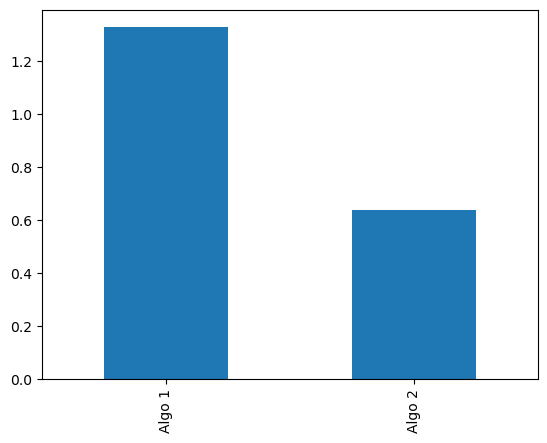

In [26]:
# Visualize the sharpe ratios as a bar plot
algo_sharpe.plot(kind='bar')


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

<AxesSubplot:>

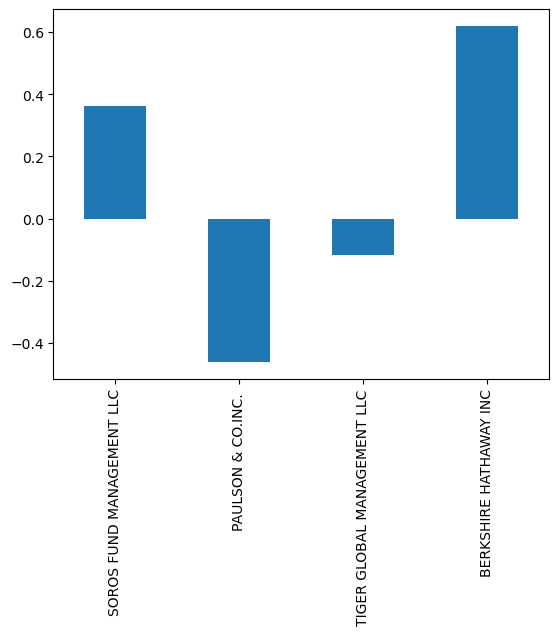

In [27]:
whale_sharpe.plot(kind='bar')

<AxesSubplot:>

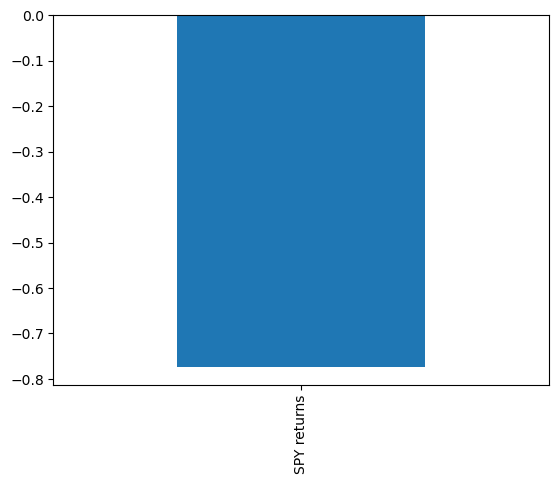

In [28]:
SP_sharpe.plot(kind='bar')

In [29]:
print('The algo trading portfolio strategies did outpreform the spy and the whale trading portfolios')

The algo trading portfolio strategies did outpreform the spy and the whale trading portfolios


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
aapl_df = pd.read_csv('aapl_historical.csv', index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [31]:
# Reading data from 2nd stock
cost_df = pd.read_csv('cost_historical.csv', index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [32]:
# Reading data from 3rd stock
goog_df = pd.read_csv('goog_historical.csv', index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [33]:
# Combine all stocks in a single DataFrame
all_portfolio = pd.concat([goog_df,cost_df,aapl_df],axis='columns',join='inner')
all_portfolio.drop('Symbol', axis=1, inplace=True)
all_portfolio.head()
columns = ['GOOGLE_ret','COST_ret','AAPL_ret']


In [34]:
# Reset Date index
aapl_df.drop('Symbol', axis=1, inplace=True)
cost_df.drop('Symbol', axis=1, inplace=True)
goog_df.drop('Symbol', axis=1, inplace=True)
apl_df = aapl_df.pct_change()
cst_df = cost_df.pct_change()
goo_df = goog_df.pct_change()

In [35]:
# Reorganize portfolio data by having a column per symbol
all_portfolio.columns = columns

all_portfolio.head()


GOOGLE_ret  COST_ret  AAPL_ret
Trade DATE                                
2019-05-09     1162.38    243.47    200.72
2019-05-08     1166.27    241.34    202.90
2019-05-07     1174.10    240.18    202.86
2019-05-06     1189.39    244.23    208.48
2019-05-03     1185.40    244.62    211.75

In [36]:
# Calculate daily returns
myport_df = all_portfolio.pct_change()
# Drop NAs
myport_df.dropna()
myport_df.rename_axis('Date',inplace=True)
# Display sample data
myport_df.head()

GOOGLE_ret  COST_ret  AAPL_ret
Date                                      
2019-05-09         NaN       NaN       NaN
2019-05-08    0.003347 -0.008749  0.010861
2019-05-07    0.006714 -0.004806 -0.000197
2019-05-06    0.013023  0.016862  0.027704
2019-05-03   -0.003355  0.001597  0.015685

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
#weights = [1/3, 1/3, 1/3]
goog_weight = [1/3]
cost_weight = [1/3]
aapl_weight = [1/3]
# Calculate portfolio return
portfolio_returns = goog_weight * myport_df["GOOGLE_ret"] + cost_weight * myport_df['COST_ret'] + aapl_weight * myport_df['AAPL_ret']
# Display sample data
portfolio_returns.head()

Date
2019-05-09         NaN
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame

all_data = pd.concat([myport_df,combined_df],axis='columns',join='inner')
all_data.head()

GOOGLE_ret  COST_ret  AAPL_ret  SPY returns    Algo 1    Algo 2  \
Date                                                                          
2019-04-23    0.006807 -0.009598  0.001545          NaN  0.004969  0.009622   
2019-04-22   -0.012423 -0.008796 -0.014218    -0.008764  0.000677 -0.001936   
2019-04-18   -0.009985  0.009818 -0.003276    -0.001011 -0.000588 -0.001229   
2019-04-17   -0.000024 -0.001017 -0.003581    -0.001577 -0.010301 -0.005228   
2019-04-16   -0.007449 -0.000896 -0.019101     0.002279 -0.006945  0.002899   

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-23                   0.007167            0.003485   
2019-04-22                  -0.002586           -0.007333   
2019-04-18                   0.001448            0.001222   
2019-04-17                  -0.002897           -0.006467   
2019-04-16                   0.002699            0.000388   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-04-23                     0.006472                0.013278  
2019-04-22                    -0.003640               -0.001088  
2019-04-18                     0.000582                0.001916  
2019-04-17                    -0.004409                0.003222  
2019-04-16                    -0.000831                0.000837

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_data.dropna(inplace=True)
all_data.head()

GOOGLE_ret  COST_ret  AAPL_ret  SPY returns    Algo 1    Algo 2  \
Date                                                                          
2019-04-22   -0.012423 -0.008796 -0.014218    -0.008764  0.000677 -0.001936   
2019-04-18   -0.009985  0.009818 -0.003276    -0.001011 -0.000588 -0.001229   
2019-04-17   -0.000024 -0.001017 -0.003581    -0.001577 -0.010301 -0.005228   
2019-04-16   -0.007449 -0.000896 -0.019101     0.002279 -0.006945  0.002899   
2019-04-15   -0.004914  0.004035 -0.000100    -0.000509 -0.004331 -0.004572   

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-22                  -0.002586           -0.007333   
2019-04-18                   0.001448            0.001222   
2019-04-17                  -0.002897           -0.006467   
2019-04-16                   0.002699            0.000388   
2019-04-15                  -0.001422           -0.001156   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-04-22                    -0.003640               -0.001088  
2019-04-18                     0.000582                0.001916  
2019-04-17                    -0.004409                0.003222  
2019-04-16                    -0.000831                0.000837  
2019-04-15                     0.000398               -0.010492

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

<AxesSubplot:>

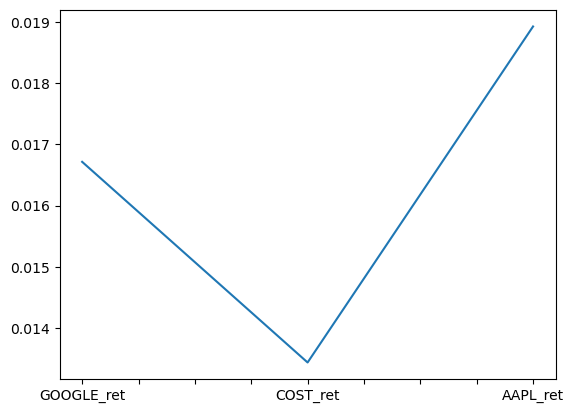

In [40]:
# Calculate the annualized `std`
my_std = myport_df.std()
std_annual = my_std * np.sqrt(252)
my_std.plot()

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

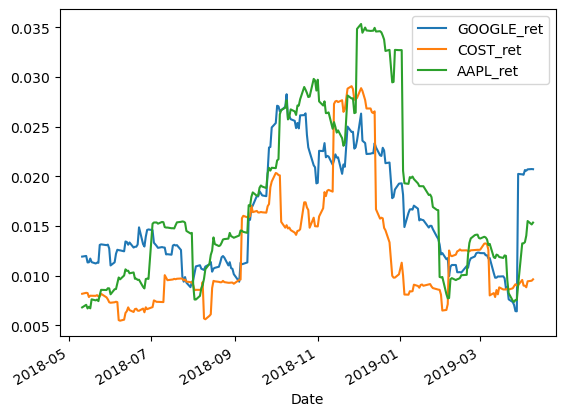

In [41]:
# Calculate rolling standard deviation
my_21 = myport_df.rolling(window=21).std()
# Plot rolling standard deviation
my_21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

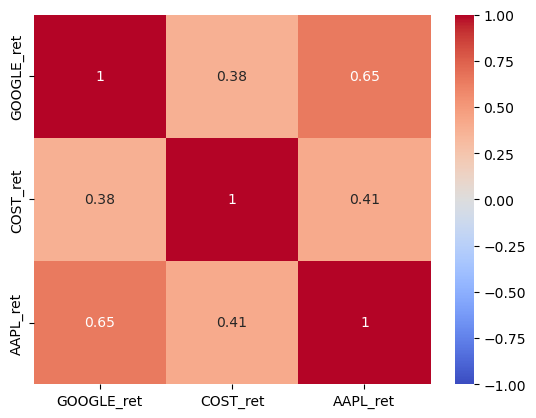

In [42]:
# Calculate and plot the correlation
my_correlation = myport_df.corr()
sns.heatmap(my_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [44]:
# Calculate and plot Beta 
#I believe the computer had an issue with me converting the axis column to date and it refused to read it in
rolling_variance1 = SP_df['SPY returns'].rolling(window=60).var()
myroll = myport_df.rolling(window=60).cov()
beta2 = myroll / rolling_variance1

<AxesSubplot:xlabel='Date,None'>

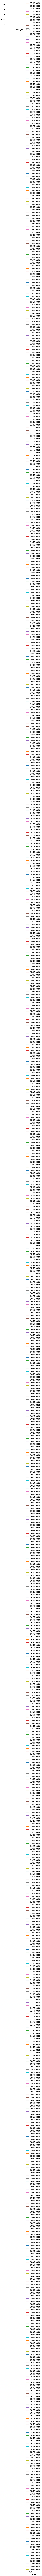

In [45]:
beta2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
my_sharpe = (252 ** 0.5) * myport_df.mean() / my_std

GOOGLE_ret   -0.084987
COST_ret     -0.929405
AAPL_ret     -0.061751
dtype: float64

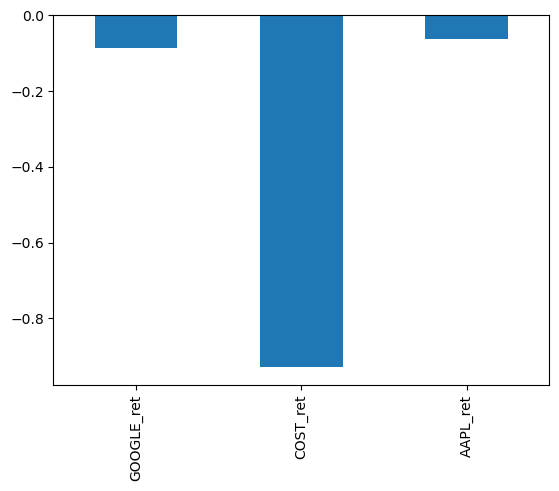

In [50]:
# Visualize the sharpe ratios as -sha bar plot
my_sharpe.plot(kind='bar')
my_sharpe.head()

### How does your portfolio do?

Write your answer here!

In [ ]:
print('my portfolio does not do as well as the algo whale or spy')